In [ ]:
%pip install openai

In [2]:
from classes.data_loader import DataLoader
from classes.technical_indicators import TechnicalIndicators
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Analysis configuration
SYMBOL = "MSFT" # ['AAPL', 'GOOGL', 'MSFT', 'NVDA', 'BRK-B']
TIME_PERIOD = "5y"

## Load data and initialize indicator instances

In [4]:
stock_loader = DataLoader(SYMBOL, period=TIME_PERIOD)
stock_data_df = stock_loader.data
stock_indicators = TechnicalIndicators(data=stock_data_df)

print(stock_data_df)

                  open        high         low       close    volume  \
date                                                                   
2020-06-01  174.888941  175.329667  173.854221  175.166794  22622400   
2020-06-02  176.527267  177.245831  173.748825  177.159607  30794600   
2020-06-03  177.073384  178.146435  175.885353  177.590744  27311000   
2020-06-04  176.575215  178.050661  174.659043  175.253052  28761800   
2020-06-05  174.965574  179.861391  174.381141  179.353607  39893600   
...                ...         ...         ...         ...       ...   
2025-05-23  449.980011  453.690002  448.910004  450.179993  16883500   
2025-05-27  456.480011  460.950012  456.119995  460.690002  20974300   
2025-05-28  461.220001  462.519989  456.929993  457.359985  17086300   
2025-05-29  461.549988  461.720001  455.309998  458.679993  13974800   
2025-05-30  459.720001  461.679993  455.540009  460.359985  34760500   

                   pe  profit_margin     roe  current_ratio   b

### Inspect the DataFrame for missing (NaN) values

In [5]:
print(f"Number of NaN values: {stock_data_df.isna().sum().sum()}")

Number of NaN values: 0


## MA50 & MA200

In [6]:
stock_data_df['ma50'] = stock_indicators.sma(period=50)
stock_data_df['ma200'] = stock_indicators.sma(period=200)

print(stock_data_df.tail(5))

                  open        high         low       close    volume  \
date                                                                   
2025-05-23  449.980011  453.690002  448.910004  450.179993  16883500   
2025-05-27  456.480011  460.950012  456.119995  460.690002  20974300   
2025-05-28  461.220001  462.519989  456.929993  457.359985  17086300   
2025-05-29  461.549988  461.720001  455.309998  458.679993  13974800   
2025-05-30  459.720001  461.679993  455.540009  460.359985  34760500   

                   pe  profit_margin     roe  current_ratio   beta  \
date                                                                 
2025-05-23  35.576508        0.35789  0.3361          1.372  0.985   
2025-05-27  35.576508        0.35789  0.3361          1.372  0.985   
2025-05-28  35.576508        0.35789  0.3361          1.372  0.985   
2025-05-29  35.576508        0.35789  0.3361          1.372  0.985   
2025-05-30  35.576508        0.35789  0.3361          1.372  0.985   

    

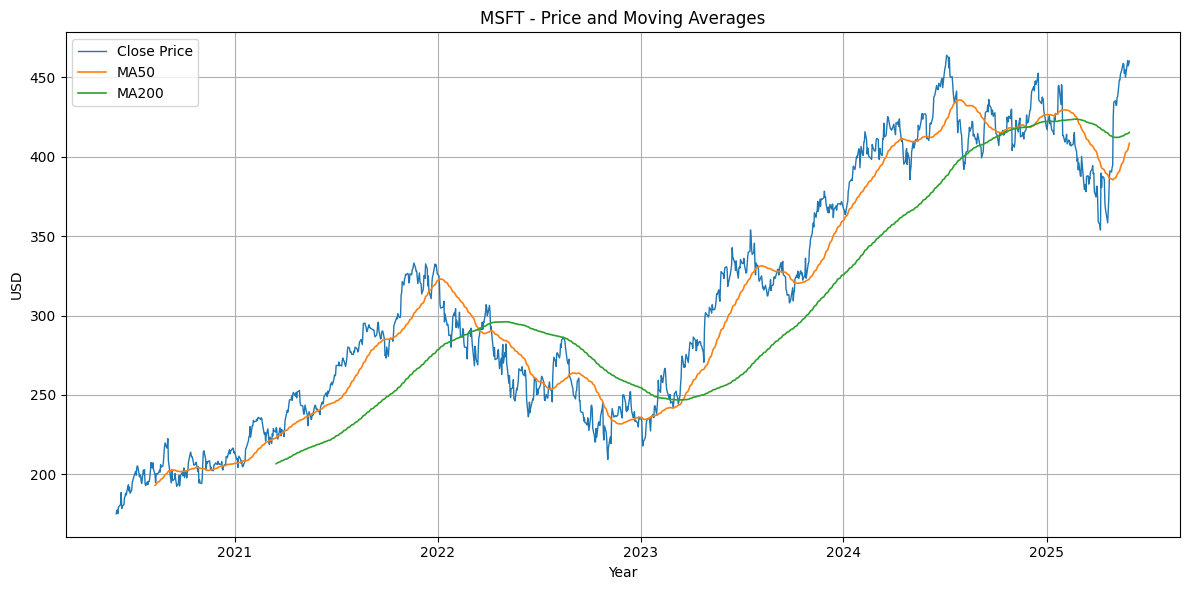

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data_df.index, stock_data_df["close"], label="Close Price", linewidth=1)
plt.plot(stock_data_df.index, stock_data_df['ma50'], label="MA50", linewidth=1.2)
plt.plot(stock_data_df.index, stock_data_df['ma200'], label="MA200", linewidth=1.2)
plt.title(f"{stock_loader.symbol} - Price and Moving Averages")
plt.xlabel("Year")
plt.ylabel("USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## RSI - 14 days

In [8]:
stock_data_df['rsi_14'] = stock_indicators.rsi()

print(stock_data_df['rsi_14'].tail(5))

date
2025-05-23    67.059548
2025-05-27    71.930983
2025-05-28    68.475638
2025-05-29    69.109100
2025-05-30    69.937082
Name: rsi_14, dtype: float64


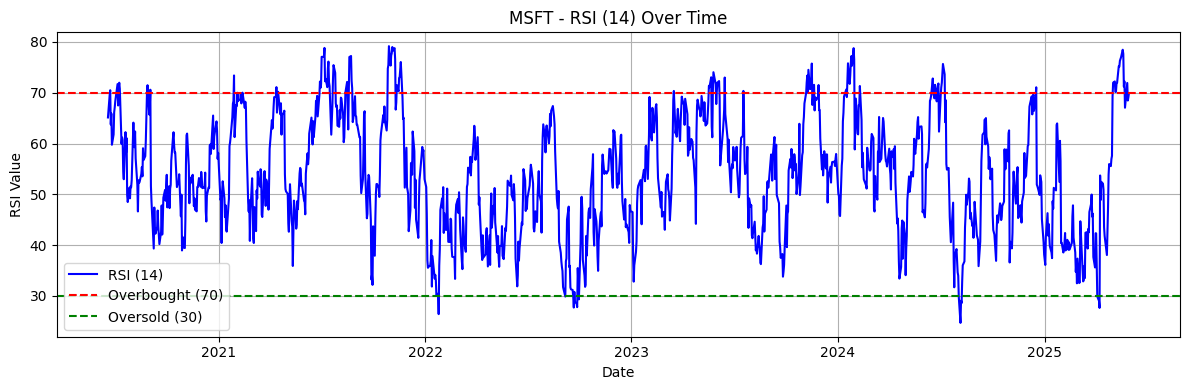

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(stock_data_df['rsi_14'], label="RSI (14)", color="blue")
plt.axhline(70, color="red", linestyle="--", label="Overbought (70)")
plt.axhline(30, color="green", linestyle="--", label="Oversold (30)")
plt.title(f"{stock_loader.symbol} - RSI (14) Over Time")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Get values for the latest data

In [10]:
latest_ma50 = stock_data_df['ma50'].iloc[-1]
latest_ma200 = stock_data_df['ma200'].iloc[-1]
latest_rsi = stock_data_df['rsi_14'].iloc[-1] 
current_price = stock_data_df["close"].iloc[-1]

latest_pe = stock_data_df['pe'].iloc[-1]
latest_profit_margin = stock_data_df['profit_margin'].iloc[-1]
latest_roe = stock_data_df['roe'].iloc[-1]
latest_current_ratio = stock_data_df['current_ratio'].iloc[-1]
latest_beta = stock_data_df['beta'].iloc[-1]

print(f"Current price: ${current_price:.2f}")
print(f"MA50: ${latest_ma50:.2f}")
print(f"MA200: ${latest_ma200:.2f}")
print(f"RSI: {latest_rsi:.1f}")
print("="*50)
print(f"PE: {latest_pe:.2f}")
print(f"Profit Margin: {latest_profit_margin:.2f}%")
print(f"ROE: {latest_roe:.2f}%")
print(f"Current Ratio: {latest_current_ratio:.2f}")
print(f"Beta: {latest_beta:.2f}")

Current price: $460.36
MA50: $408.53
MA200: $415.44
RSI: 69.9
PE: 35.58
Profit Margin: 0.36%
ROE: 0.34%
Current Ratio: 1.37
Beta: 0.98


## S&P 500 Index

In [11]:
from utils import calculate_percentage_change

sp500_loader = DataLoader("^GSPC", period="1mo")
sp500_data = sp500_loader.data
sp500_pct = calculate_percentage_change(sp500_data["close"]) # calculate percentage change

print(sp500_pct.tail(5))

date
2025-05-23    4.197473
2025-05-27    6.329254
2025-05-28    5.736870
2025-05-29    6.161001
2025-05-30    6.152383
Name: close, dtype: float64


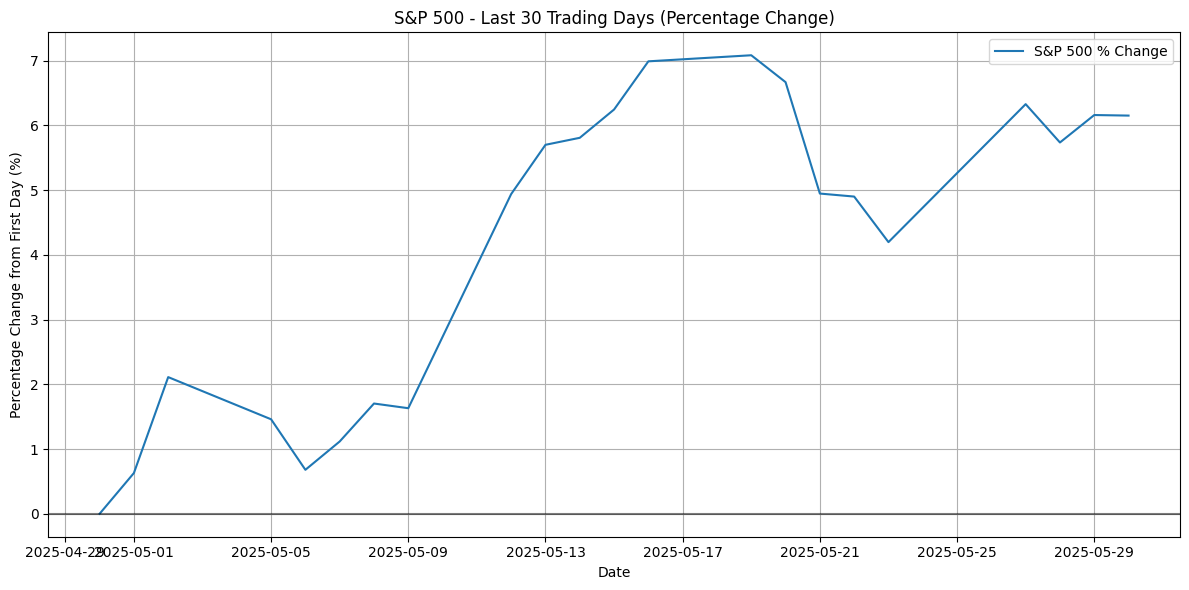

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(sp500_data.index, sp500_pct, label="S&P 500 % Change")
plt.title("S&P 500 - Last 30 Trading Days (Percentage Change)")
plt.xlabel("Date")
plt.ylabel("Percentage Change from First Day (%)")
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

## 30-Day Stock vs S&P 500

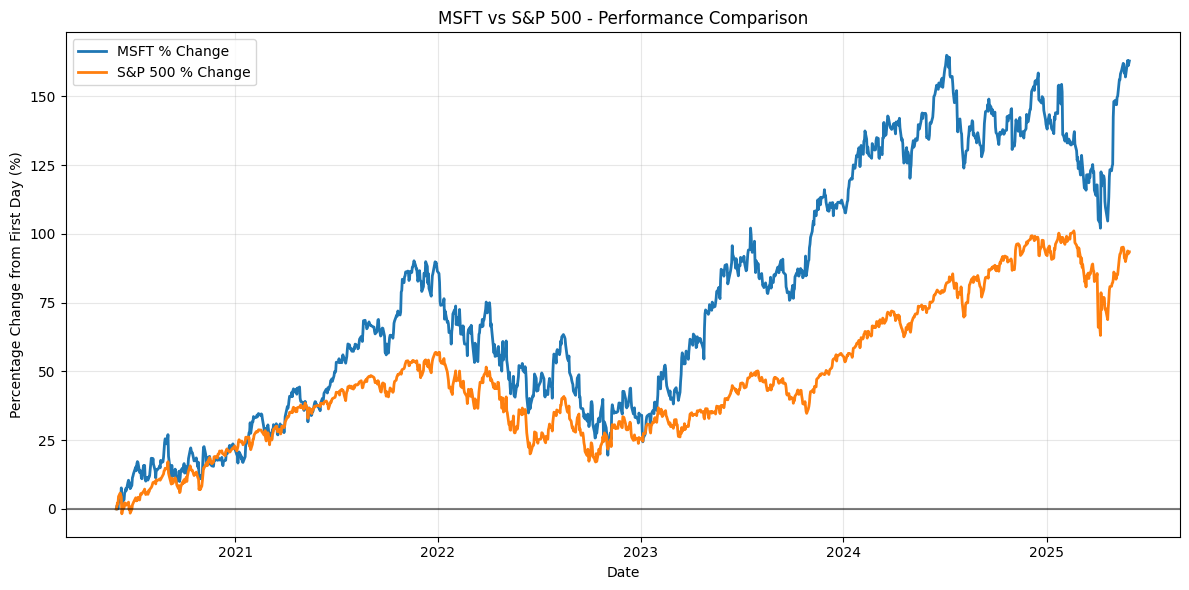

In [13]:
# Load stock data for 30 days (same as SP500)
stock_loader = DataLoader(SYMBOL, period=TIME_PERIOD)
stock_data_df = stock_loader.data

# Load SP500 data (already 30 days)
sp500_loader = DataLoader("^GSPC", period=TIME_PERIOD)
sp500_data = sp500_loader.data

# Calculate both percentage changes
stock_pct = calculate_percentage_change(stock_data_df["close"]).round(2)
sp500_pct = calculate_percentage_change(sp500_data["close"]).round(2)

# Now the plot should show both lines
plt.figure(figsize=(12, 6))
plt.plot(stock_data_df.index, stock_pct, label=f"{stock_loader.symbol} % Change", linewidth=2)
plt.plot(sp500_data.index, sp500_pct, label="S&P 500 % Change", linewidth=2)
plt.title(f"{stock_loader.symbol} vs S&P 500 - Performance Comparison")
plt.xlabel("Date")
plt.ylabel("Percentage Change from First Day (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

## Test OpenAI Chat 

In [16]:
from classes.openai_chat import StockAnalysisAI

try:
    stock_loader_1mo = DataLoader("AAPL", period="1mo")
    stock_data_1mo_df = stock_loader_1mo.data
    stock_indicators_1mo = TechnicalIndicators(data=stock_data_1mo_df)
    stock_data_1mo_df['ma50'] = stock_indicators_1mo.sma(period=50)
    stock_data_1mo_df['ma200'] = stock_indicators_1mo.sma(period=200)
    stock_data_1mo_df['rsi_14'] = stock_indicators_1mo.rsi()

    sp500_loader_1mo = DataLoader("^GSPC", period="1mo")
    sp500_data_1mo_df = sp500_loader_1mo.data

    ai = StockAnalysisAI()
    analysis = ai.analyze_stock(
        stock=stock_data_1mo_df,
        index=sp500_data_1mo_df,
        stock_symbol=stock_loader_1mo.symbol,
        index_symbol=sp500_loader.symbol
    )
    print(analysis)

except Exception as e:
    print(f"Unexpected error: {e}")

AAPL has experienced a recent price decline of -5.36%, underperforming the S&P 500 (^GSPC), which gained +6.15% during the same period. The stock's RSI is currently at 39.75, indicating it is approaching oversold territory but is not yet below the critical threshold of 30. There are no available moving averages (MA50 and MA200) to assess potential crossovers or trend breaks. Key performance indicators show a P/E ratio of 31.24, a robust profit margin of 24.30%, and an impressive ROE of 138.02%, although the current ratio of 0.82 suggests potential liquidity concerns. The stock's beta of 1.275 indicates higher volatility compared to the market, which may affect risk assessment. Recent trading volume has shown significant fluctuations, with peaks suggesting increased investor activity, but without clear directional trends due to the absence of moving average data.
